<a href="https://colab.research.google.com/github/harikavelaga9999/Health-care-sentimental-analysis/blob/main/Health_care_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/cms_hospital_patient_satisfaction_2020.csv')

<ipython-input-3-2d36b7cee6e1>:1: DtypeWarning: Columns (14,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/cms_hospital_patient_satisfaction_2020.csv')


In [7]:
print(data.head())

  Facility ID                     Facility Name                 Address  \
0      010001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1      010001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2      010001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3      010001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4      010001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name    Phone Number      HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON  (334) 793-8701           H_COMP_1_A_P   
1  DOTHAN    AL     36301     HOUSTON  (334) 793-8701          H_COMP_1_SN_P   
2  DOTHAN    AL     36301     HOUSTON  (334) 793-8701           H_COMP_1_U_P   
3  DOTHAN    AL     36301     HOUSTON  (334) 793-8701  H_COMP_1_LINEAR_SCORE   
4  DOTHAN    AL     36301     HOUSTON  (334) 793-8701   H_COMP_1_STAR_RATING   

                                     HCAHPS Question  ...  \
0  Pati

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37717 entries, 0 to 37716
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Facility ID                                                    37717 non-null  object 
 1   Facility Name                                                  37717 non-null  object 
 2   Address                                                        37717 non-null  object 
 3   City                                                           37717 non-null  object 
 4   State                                                          37717 non-null  object 
 5   ZIP Code                                                       37717 non-null  int64  
 6   County Name                                                    37717 non-null  object 
 7   Phone Number                                              

In [9]:
print(data.describe())

           ZIP Code  Patient Survey Star Rating Footnote     Year  \
count  37717.000000                           902.000000  37717.0   
mean   75811.598112                            12.536585   2020.0   
std    22478.472355                             4.466958      0.0   
min    35007.000000                             5.000000   2020.0   
25%    71852.000000                             5.000000   2020.0   
50%    85364.000000                            15.000000   2020.0   
75%    93065.000000                            15.000000   2020.0   
max    99929.000000                            19.000000   2020.0   

       Hospital overall rating footnote  \
count                       7254.000000   
mean                          16.205128   
std                            2.705163   
min                            5.000000   
25%                           16.000000   
50%                           16.000000   
75%                           17.000000   
max                           22.0

In [10]:
missing_data = data.isnull().sum()
print("Missing values per column:\n", missing_data)

Missing values per column:
 Facility ID                                                          0
Facility Name                                                        0
Address                                                              0
City                                                                 0
State                                                                0
ZIP Code                                                             0
County Name                                                          0
Phone Number                                                         0
HCAHPS Measure ID                                                    0
HCAHPS Question                                                      0
HCAHPS Answer Description                                            0
Patient Survey Star Rating                                           0
Patient Survey Star Rating Footnote                              36815
HCAHPS Answer Percent                            

In [11]:
data = data.dropna()

In [12]:
if 'SatisfactionScore' in data.columns:  # Replace with the actual column name
    plt.figure(figsize=(10, 6))
    sns.histplot(data['SatisfactionScore'], bins=20, kde=True, color='blue')
    plt.title("Distribution of Patient Satisfaction Scores")
    plt.xlabel("Satisfaction Score")
    plt.ylabel("Frequency")
    plt.show()

In [16]:
if 'HospitalName' in data.columns and 'SatisfactionScore' in data.columns:
    avg_scores = data.groupby('HospitalName')['SatisfactionScore'].mean().sort_values(ascending=False)
    print("Top 10 Hospitals by Satisfaction:")
    print(avg_scores.head(10))

    # Plotting
    plt.figure(figsize=(12, 6))
    avg_scores.head(10).plot(kind='bar', color='green')
    plt.title("Top 10 Hospitals by Average Satisfaction Score")
    plt.xlabel("Hospital Name")
    plt.ylabel("Average Satisfaction Score")
    plt.xticks(rotation=45)
    plt.show()


In [17]:
if 'Region' in data.columns and 'SatisfactionScore' in data.columns:
    region_scores = data.groupby('Region')['SatisfactionScore'].mean()
    plt.figure(figsize=(10, 6))
    region_scores.plot(kind='bar', color='orange')
    plt.title("Average Satisfaction Score by Region")
    plt.xlabel("Region")
    plt.ylabel("Average Satisfaction Score")
    plt.xticks(rotation=45)
    plt.show()

In [18]:
if 'Comments' in data.columns:
    from wordcloud import WordCloud
    text = " ".join(comment for comment in data['Comments'].dropna())
    wordcloud = WordCloud(background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Patient Feedback")
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


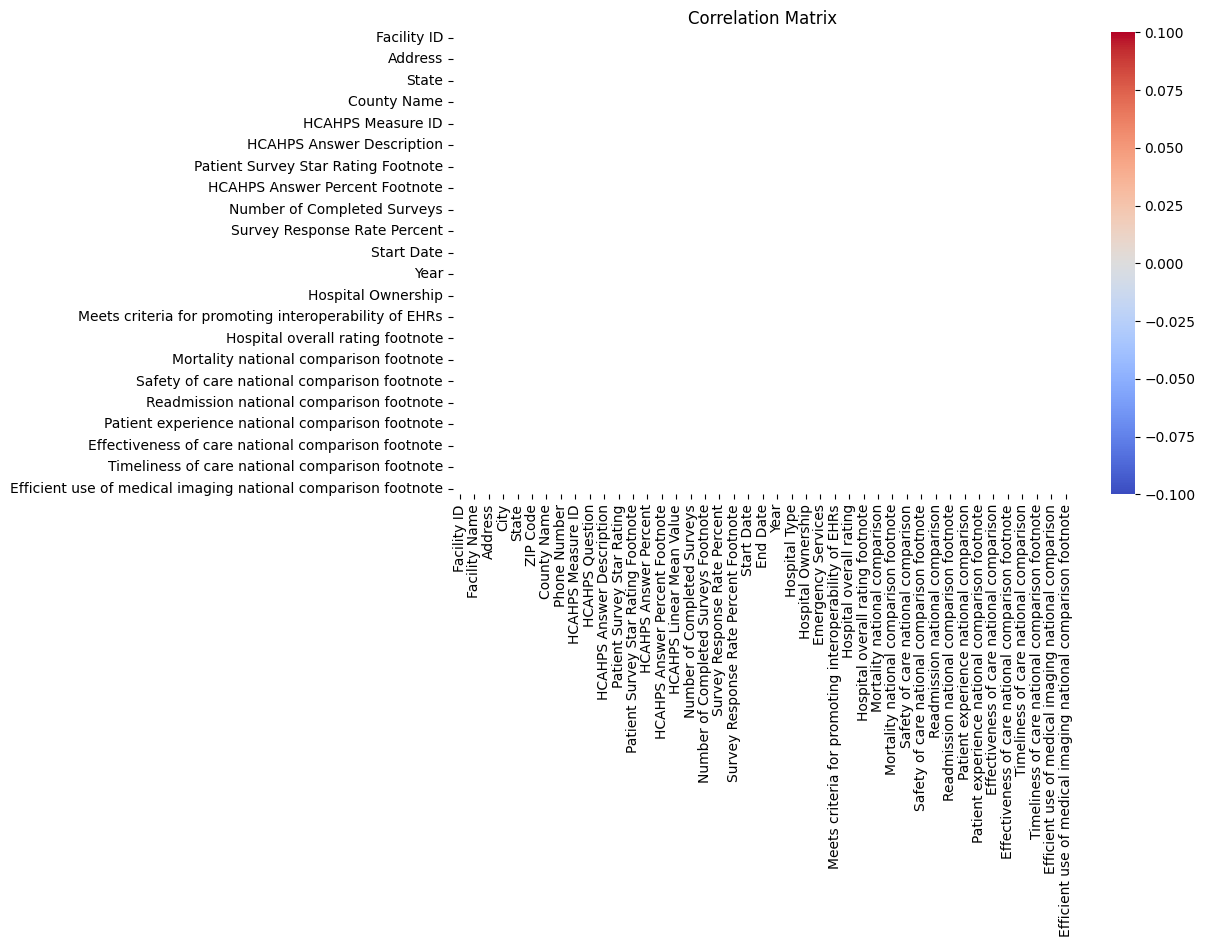

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
